In [58]:
import os
import pandas as pd

train_path = os.path.join('./', 'train.csv')
data = pd.read_csv(train_path)
test_path = os.path.join('./', 'test.csv')
test = pd.read_csv(test_path)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


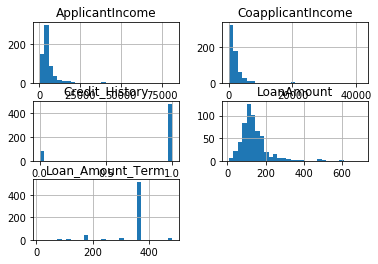

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data.hist(bins=30)
plt.show()


/home/sarah-angel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/sarah-angel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


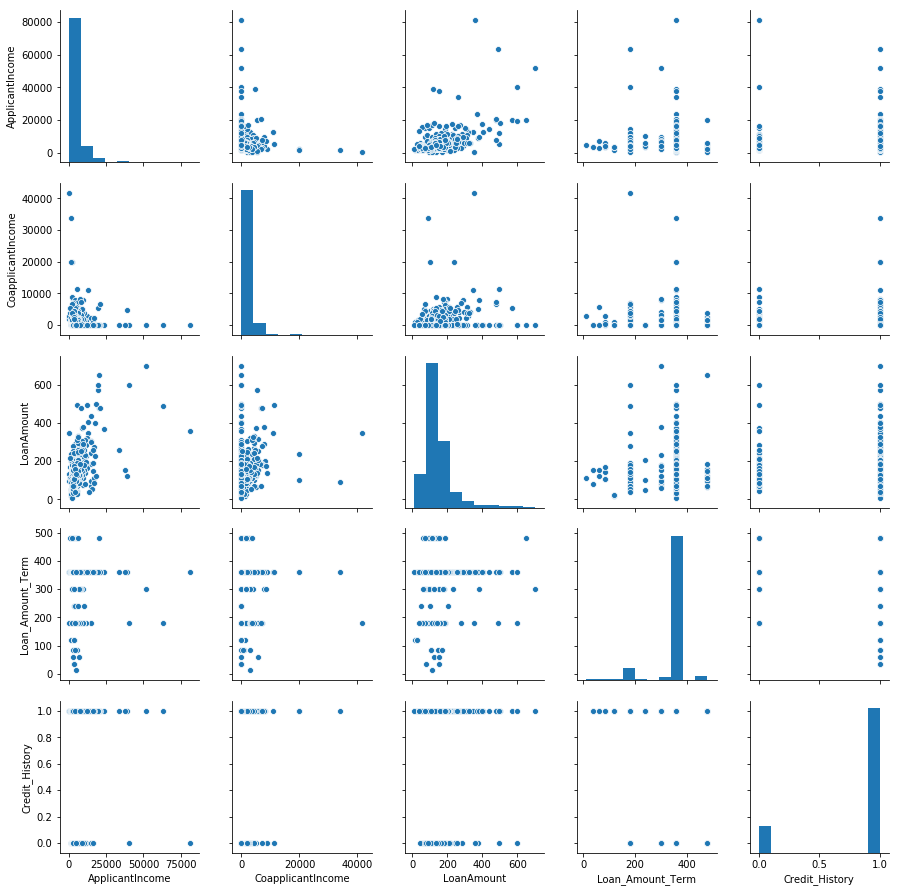

In [7]:
sns.pairplot(data)

In [8]:
#Check how credit history affects loan status
#shows that a higher percentage of people (79.6%) with good credit got approved
pd.crosstab(data.Loan_Status, data.Credit_History, normalize="columns")


Credit_History,0.0,1.0
Loan_Status,,
N,0.921348,0.204211
Y,0.078652,0.795789


In [9]:
#Check how gender affects loan status
pd.crosstab(data.Loan_Status, data.Gender, normalize="columns")


Gender,Female,Male
Loan_Status,,
N,0.330357,0.306748
Y,0.669643,0.693252


In [10]:
#Check how married affects loan status
#married people are slighty more likely to get approved
pd.crosstab(data.Loan_Status, data.Married, normalize="columns")


Married,No,Yes
Loan_Status,,
N,0.370892,0.28392
Y,0.629108,0.71608


In [11]:
#Check how dependents affects loan status
pd.crosstab(data.Loan_Status, data.Dependents, normalize="columns")


Dependents,0,1,2,3+
Loan_Status,,,,
N,0.310145,0.352941,0.247525,0.352941
Y,0.689855,0.647059,0.752475,0.647059


In [12]:
#Check how education affects loan status
#graduates are 10% more likely to get approved
pd.crosstab(data.Loan_Status, data.Education, normalize="columns")


Education,Graduate,Not Graduate
Loan_Status,,
N,0.291667,0.38806
Y,0.708333,0.61194


In [13]:
#Check how self employed affects loan status
#Doesn't really affect
pd.crosstab(data.Loan_Status, data.Self_Employed, normalize="columns")


Self_Employed,No,Yes
Loan_Status,,
N,0.314,0.317073
Y,0.686,0.682927


In [14]:
#Check how property area affects loan status
#Semi-urban has the highest approval rate
pd.crosstab(data.Loan_Status, data.Property_Area, normalize="columns")


Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,0.385475,0.23176,0.341584
Y,0.614525,0.76824,0.658416


In [15]:
#Check how loan amount term affects loan status
#84 months has the highest approval rate
#360 months has the highest percentage of approved
pd.crosstab(data.Loan_Status, data.Loan_Amount_Term, normalize="columns")

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
Loan_Status,,,,,,,,,,
N,0.0,1.0,0.0,0.25,0.0,0.340909,0.25,0.384615,0.298828,0.6
Y,1.0,0.0,1.0,0.75,1.0,0.659091,0.75,0.615385,0.701172,0.4


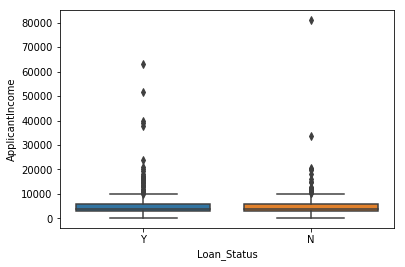

In [16]:
#Check how applicant income affects loan status
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=data, )

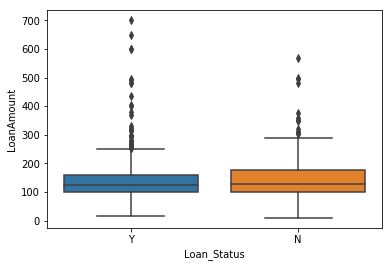

In [17]:
#Check how loan amount affects loan status
sns.boxplot(x="Loan_Status", y="LoanAmount", data=data, )

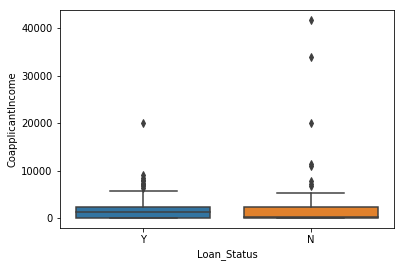

In [18]:
#Check how coapplicant income affects loan status
sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=data)

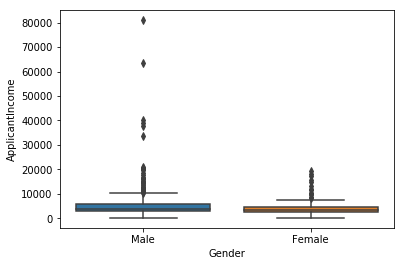

In [19]:
#Check relationship between gender and income
#Males generally have higher incomes
sns.boxplot(x="Gender", y="ApplicantIncome", data=data)

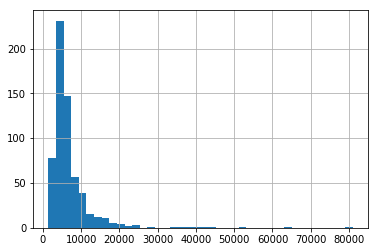

In [61]:
#Combine applicant and coapplicant income to make total income
#View distribution
data["TotalIncome"] = data.ApplicantIncome + data.CoapplicantIncome
data.TotalIncome.hist(bins=40)

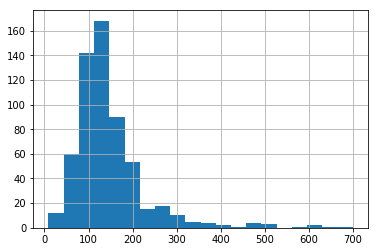

In [21]:
#View distribution
data.LoanAmount.hist(bins=20)

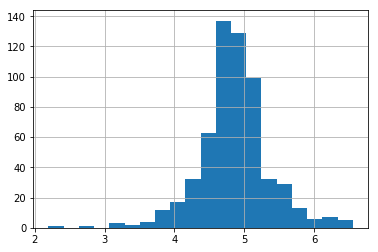

In [62]:
import numpy as np

#Many outliers that might be people applying for big loans for specific needs
#use log to minimize them
data["LoanAmountLog"] = np.log(data.LoanAmount)
data.LoanAmountLog.hist(bins=20)
#sns.boxplot(x="Loan_Status", y="LoanAmountLog", data=data)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fddeebe2be0>,
      dtype=object)

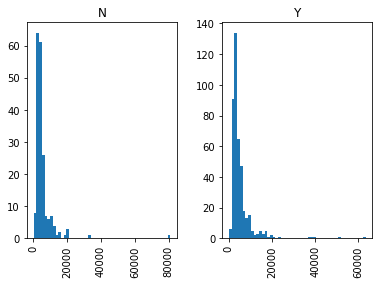

In [115]:
#ApplicantIncome vs Loan_Status
data.ApplicantIncome.hist(by=data.Loan_Status, bins=50)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fddeeb15cc0>,
      dtype=object)

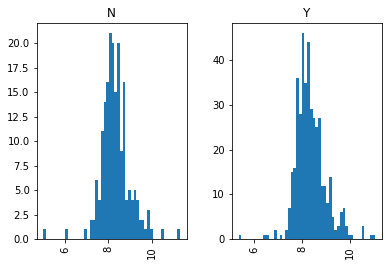

In [116]:
#Minimizing outliers in ApplicantIncome
data['ApplicantIncomeLog'] = np.log(data.ApplicantIncome)
data.ApplicantIncomeLog.hist(by=data.Loan_Status, bins=50)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fddeed63048>,
      dtype=object)

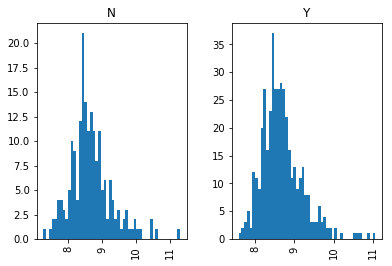

In [114]:
#Transforming to remove outliers and make a normal distribution
data['TotalIncomeLog'] = np.log(data.TotalIncome)
data.TotalIncomeLog.hist(by=data.Loan_Status, bins=50)

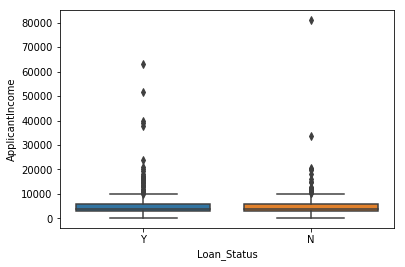

In [107]:
#Check relationship between TotalIncomeLog and Loan_Status
#sns.boxplot(x="Loan_Status", y="TotalIncomeLog", data=data)


## Data Cleaning

In [65]:
#Imputing missing values for Gender
#Significantly more male than female so replace all missing with Male
data.Gender.fillna(data.Gender.mode()[0], inplace=True)

#Imputing missing values for Married
data.Married.fillna(data.Married.mode()[0], inplace=True)

#Imputing missing values for Credit_History
data.Credit_History.fillna(data.Credit_History.mode()[0], inplace=True)

#Imputing missing values for Dependents
data.Dependents.fillna(data.Dependents.mode()[0], inplace=True)

#Imputing missing values for Self_Employed
data.Self_Employed.fillna(data.Self_Employed.mode()[0], inplace=True)

#Imputing missing values for Loan_Amount_Term
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mode()[0], inplace=True)

#Imputing missing values for LoanAmount
data.LoanAmount.fillna(data.LoanAmount.mean(), inplace=True)

#Imputing missing values for LoanAmountLog
data.LoanAmountLog.fillna(data.LoanAmountLog.mean(), inplace=True)


In [66]:
data = data.drop(["Loan_ID"], axis=1)

In [291]:
data.info()
data.Loan_Status.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
Gender                614 non-null object
Married               614 non-null object
Dependents            614 non-null object
Education             614 non-null object
Self_Employed         614 non-null object
ApplicantIncome       614 non-null int64
CoapplicantIncome     614 non-null float64
LoanAmount            614 non-null float64
Loan_Amount_Term      614 non-null float64
Credit_History        614 non-null float64
Property_Area         614 non-null object
Loan_Status           614 non-null object
TotalIncome           614 non-null float64
LoanAmountLog         614 non-null float64
TotalIncomeLog        614 non-null float64
ApplicantIncomeLog    614 non-null float64
dtypes: float64(8), int64(1), object(7)
memory usage: 76.8+ KB


Y    422
N    192
Name: Loan_Status, dtype: int64

In [292]:
#Handling categorical features
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

binary_cats = ["Gender", "Married", "Education", "Self_Employed", "Loan_Status"]
multi_cats = ["Dependents", "Property_Area"]

binary_encoder = LabelBinarizer()
hot_encoder = OneHotEncoder(sparse=False)

data_copy = data.copy()
data_copy.reset_index(drop=True, inplace=True)

for cat in binary_cats:
    data_copy[cat] = binary_encoder.fit_transform(data_copy[cat])
    
data_hotenc = hot_encoder.fit_transform(data_copy[multi_cats])

hotenc_columns = hot_encoder.get_feature_names(multi_cats)
hotencoded_data = pd.DataFrame(data_hotenc, columns=hotenc_columns)

data_encoded = data_copy.join(hotencoded_data)
data_encoded = data_encoded.drop(multi_cats, axis=1)


#Trying to balance the dataset, Accuracy not as good
dy = data_encoded.where(data_encoded.Loan_Status == 1).iloc[: 400]
dn = data_encoded.where(data_encoded.Loan_Status == 0)
balanced_data = pd.concat([dy, dn])
balanced_data.dropna(inplace=True)
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)
#balanced_data.sample(frac=1)

balanced_data.Loan_Status.value_counts()
balanced_data.head()

##Model

In [358]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

features = ["Gender", "Credit_History", "Education","Property_Area_Rural", "Property_Area_Semiurban", "Property_Area_Urban", "Married"]

y = data_encoded.Loan_Status
x = data_encoded[features]

model = LogisticRegression() #0.809
svm_model = SVC(class_weight='balanced') #0.809
decision_tree_model = DecisionTreeClassifier() #0.804
random_forest_model = RandomForestClassifier(max_depth=10, n_estimators=100) #0.804
knn_model = KNeighborsClassifier(n_neighbors=20) #0.785
gnb_model = GaussianNB() #0.809
xgb_model = xgb.XGBClassifier(objective="reg:squarederror", eval_metric="auc", gamma=0.5, learning_rate=0.5) #0.809

In [359]:
from sklearn.model_selection import KFold
from sklearn.metrics import auc, confusion_matrix

#Model training
def classification(model):
    kf = KFold(n_splits=5)

    scores = []
    
    print("[tn fp fn tp]")
    for train_idx, test_idx in kf.split(x):
        x_train, x_test, y_train, y_test = x.iloc[train_idx], x.iloc[test_idx], y[train_idx], y[test_idx]
    
        model.fit(x_train, y_train)
        scores.append(model.score(x_test, y_test))
        print(confusion_matrix(y_test, model.predict(x_test)).ravel())
    
    print("Mean score: ", np.mean(scores))

classification(gnb_model)
    

[tn fp fn tp]
[17 23  1 82]
[12 27  2 82]
[14 22  2 85]
[21 17  1 84]
[18 21  1 82]
Mean score:  0.809462881514061


In [345]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
Gender                     614 non-null int64
Married                    614 non-null int64
Education                  614 non-null int64
Self_Employed              614 non-null int64
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Loan_Status                614 non-null int64
TotalIncome                614 non-null float64
LoanAmountLog              614 non-null float64
TotalIncomeLog             614 non-null float64
ApplicantIncomeLog         614 non-null float64
Dependents_0               614 non-null float64
Dependents_1               614 non-null float64
Dependents_2               614 non-null float64
Dependents_3+              614 non-null float64
Property_Area_Rural        614 non-null flo

0.8045848327335733

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
TotalIncome          367 non-null int64
LoanAmountLog        367 non-null float64
TotalIncomeLog       367 non-null float64
dtypes: float64(5), int64(3), object(7)
memory usage: 43.1+ KB


In [83]:
#Test set preparation
test["TotalIncome"] = test.ApplicantIncome + test.CoapplicantIncome
test['LoanAmountLog'] = np.log(test.LoanAmount)
test['TotalIncomeLog'] = np.log(test.TotalIncome)

#Imputing missing values for Gender
#Significantly more male than female so replace all missing with Male
test.Gender.fillna(test.Gender.mode()[0], inplace=True)

#Imputing missing values for Married
test.Married.fillna(test.Married.mode()[0], inplace=True)

#Imputing missing values for Credit_History
test.Credit_History.fillna(test.Credit_History.mode()[0], inplace=True)

#Imputing missing values for Dependents
test.Dependents.fillna(test.Dependents.mode()[0], inplace=True)

#Imputing missing values for Self_Employed
test.Self_Employed.fillna(test.Self_Employed.mode()[0], inplace=True)

#Imputing missing values for Loan_Amount_Term
test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mode()[0], inplace=True)

#Imputing missing values for LoanAmount
test.LoanAmount.fillna(test.LoanAmount.mean(), inplace=True)

#Imputing missing values for LoanAmountLog
test.LoanAmountLog.fillna(test.LoanAmountLog.mean(), inplace=True)

test_copy = test.copy()
binary_cats = ["Gender", "Married", "Education", "Self_Employed"]

for cat in binary_cats:
    test_copy[cat] = binary_encoder.fit_transform(test_copy[cat])
    
test_hotenc = hot_encoder.fit_transform(test_copy[multi_cats])

hotenc_columns = hot_encoder.get_feature_names(multi_cats)
hotencoded_test = pd.DataFrame(test_hotenc, columns=hotenc_columns)

test_encoded = test_copy.join(hotencoded_test)
test_encoded = test_encoded.drop(multi_cats, axis=1)

test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 20 columns):
Loan_ID                    367 non-null object
Gender                     367 non-null int64
Married                    367 non-null int64
Education                  367 non-null int64
Self_Employed              367 non-null int64
ApplicantIncome            367 non-null int64
CoapplicantIncome          367 non-null int64
LoanAmount                 367 non-null float64
Loan_Amount_Term           367 non-null float64
Credit_History             367 non-null float64
TotalIncome                367 non-null int64
LoanAmountLog              367 non-null float64
TotalIncomeLog             367 non-null float64
Dependents_0               367 non-null float64
Dependents_1               367 non-null float64
Dependents_2               367 non-null float64
Dependents_3+              367 non-null float64
Property_Area_Rural        367 non-null float64
Property_Area_Semiurban    367 non-null float6

In [84]:
test_LoanID = test_encoded.Loan_ID
test_LoanID = pd.DataFrame(test_LoanID, columns=["Loan_ID"])

test_encoded = test_encoded.drop('Loan_ID', axis=1)
#test_x = test_encoded.drop(["Gender", "Dependents_0", "Dependents_1", "Dependents_3+", "Self_Employed"], axis=1)
test_x = test_encoded[features]

preds = model.predict(test_x)


In [55]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 12 columns):
Married                    592 non-null int64
Education                  592 non-null int64
ApplicantIncome            592 non-null int64
CoapplicantIncome          592 non-null float64
LoanAmount                 592 non-null float64
Loan_Amount_Term           592 non-null float64
Credit_History             592 non-null float64
Loan_Status                592 non-null int64
TotalIncome                592 non-null float64
Property_Area_Rural        592 non-null float64
Property_Area_Semiurban    592 non-null float64
Property_Area_Urban        592 non-null float64
dtypes: float64(8), int64(4)
memory usage: 55.6 KB


In [85]:
preds_df = pd.DataFrame(preds, columns=["Loan_Status"])
preds_df.Loan_Status = preds_df.Loan_Status.map({True: 'Y', False: 'N'})
preds_df = test_LoanID.join(preds_df)
preds_df.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [86]:
#export predictions to csv
export_path = os.path.join("./", "submission.csv")
preds_df.to_csv(export_path, index=False, header=True)